#**Cargando el dataset del ECG**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm import tqdm
import pandas as pd
from IPython.display import display
import csv
import sympy
from scipy.fft import fft
import scipy.signal as signal
from math import log10

A continuación se procede a cargar el archivo que contiene las señales del ECG, así como el target del mismo

In [ ]:
with np.load('Dataset_ECG_save.npz') as data:
    # Recuperar los arrays del archivo y reconstruir el diccionario
    Dataset_ECG = {key: data[key] for key in data.keys()}
Dataset_ECG

{'base': array([[570., 568., 563., ..., 521., 527., 530.],
        [531., 531., 529., ..., 502., 506., 510.],
        [513., 514., 515., ..., 508., 517., 521.],
        ...,
        [692., 713., 732., ...,   0.,   0.,   0.],
        [533., 532., 531., ...,   0.,   0.,   0.],
        [540., 539., 537., ...,   0.,   0.,   0.]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

In [ ]:
datos_totales=Dataset_ECG["base"]
datos_totales.shape

(150, 1000)

##Seleccionando los datos según basal, aguantando la respiración o en movimiento

In [ ]:
#Para separar en tres secciones 
num_secciones = 3
filas_por_seccion = datos_totales.shape[0] // num_secciones
secciones = np.split(datos_totales, num_secciones, axis=0)
#Guardando cada base
base=secciones[0]
respiracion=secciones[1]
post_ejercicio=secciones[2]

In [ ]:
base.shape

(50, 1000)

In [ ]:
respiracion.shape

(50, 1000)

In [ ]:
post_ejercicio.shape

(50, 1000)

#Arreglando la señal y uniendo Basal, Respiración y post Ejercicio

## Analizando el estado basal


Text(0, 0.5, 'mV')

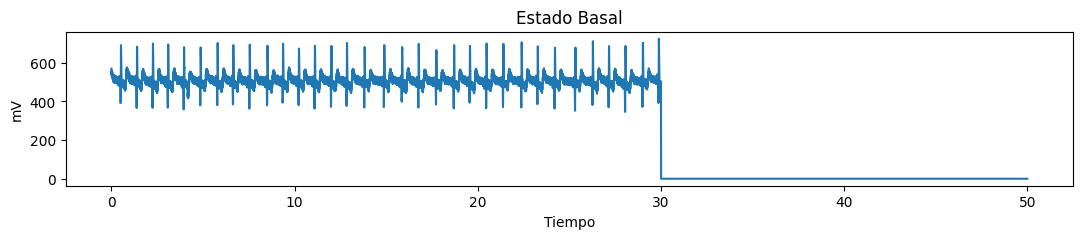

In [ ]:
#Mostrar datos en el tiempo
base_r=np.reshape(base,-1)
#Frecuencia de muestreo del dispositivo de adquisición
Fs = 1000 
Ts=1/Fs
n = np.arange(0,base_r.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, base_r)
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

###Cortando señal (Eliminando los ceros del Dataset)

Text(0, 0.5, 'mV')

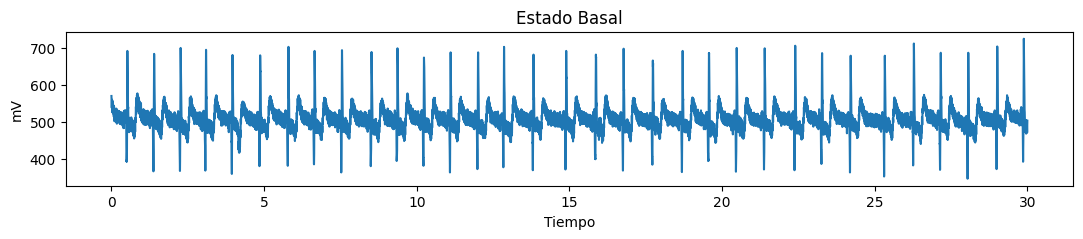

In [ ]:
base_total=base_r[np.nonzero(base_r)]

Ts=1/1000
n = np.arange(0,base_total.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, base_total)
plt.title("Estado Basal")
plt.xlabel('Tiempo')
plt.ylabel('mV')

## Analizando el estado Respiración

Text(0, 0.5, 'mV')

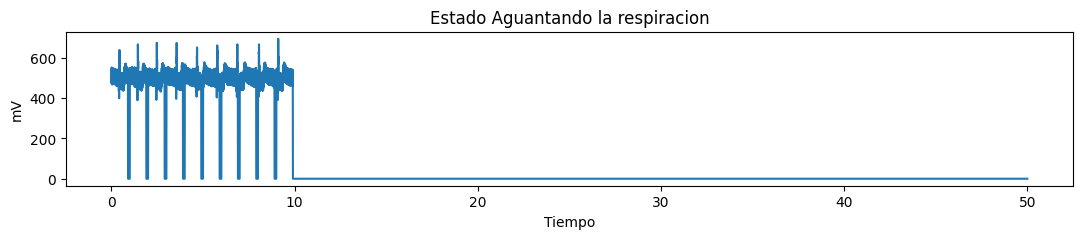

In [ ]:
#Mostrar datos en el tiempo
respiracion_r=np.reshape(respiracion,-1)
#Frecuencia de muestreo del dispositivo de adquisición
Fs = 1000 
Ts=1/Fs
n = np.arange(0,respiracion_r.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, respiracion_r)
plt.title("Estado Aguantando la respiracion")
plt.xlabel('Tiempo')
plt.ylabel('mV')

###Cortando señal (Eliminando valores iguales a cero)

Text(0, 0.5, 'mV')

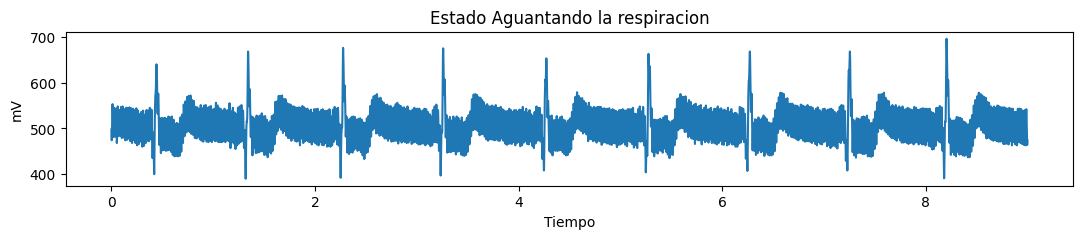

In [ ]:
base_total_respiracion=respiracion_r[np.nonzero(respiracion_r)]

Ts=1/Fs
n = np.arange(0,base_total_respiracion.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, base_total_respiracion)
plt.title("Estado Aguantando la respiracion")
plt.xlabel('Tiempo')
plt.ylabel('mV')

## Analizando el estado post-ejercicio

Text(0, 0.5, 'mV')

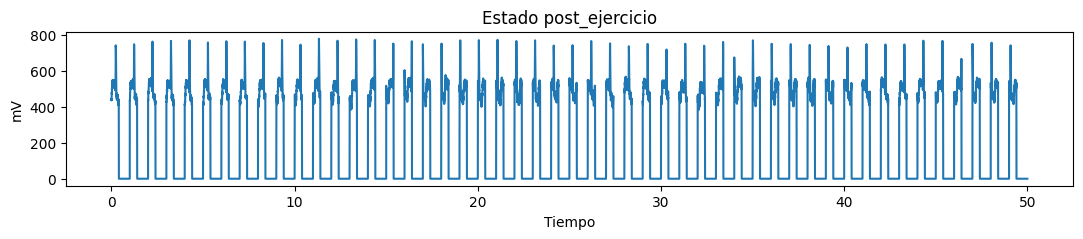

In [ ]:
#Mostrar datos en el tiempo
post_ejercicio_r=np.reshape(post_ejercicio,-1)
#Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n = np.arange(0,post_ejercicio_r.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, post_ejercicio_r)
plt.title("Estado post_ejercicio")
plt.xlabel('Tiempo')
plt.ylabel('mV')

### Cortando señal (Eliminando los ceros de la señal)

Text(0, 0.5, 'mV')

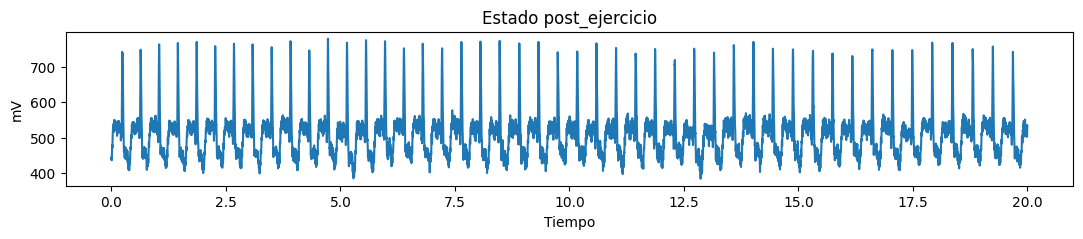

In [ ]:
base_total_post_ejercicio=post_ejercicio_r[np.nonzero(post_ejercicio_r)]

Ts=1/Fs
n = np.arange(0,base_total_post_ejercicio.shape[0])  # t = n*Ts ; Ventor de numeros de datos
t = n*Ts #VECTOR TIEMPO 
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t, base_total_post_ejercicio)
plt.title("Estado post_ejercicio")
plt.xlabel('Tiempo')
plt.ylabel('mV')

#Uniendo Las 3 señales

In [ ]:
senal_ecg=[base_total,base_total_respiracion,base_total_post_ejercicio]

# Conversión de los ndarray en Series de Pandas
ser1 = pd.Series(base_total)
ser2 = pd.Series(base_total_respiracion)
ser3 = pd.Series(base_total_post_ejercicio)

# Concatenación de las Series
new_data = pd.concat([ser1, ser2, ser3], axis=0, ignore_index=True)


##Graficando Toda la señal junta

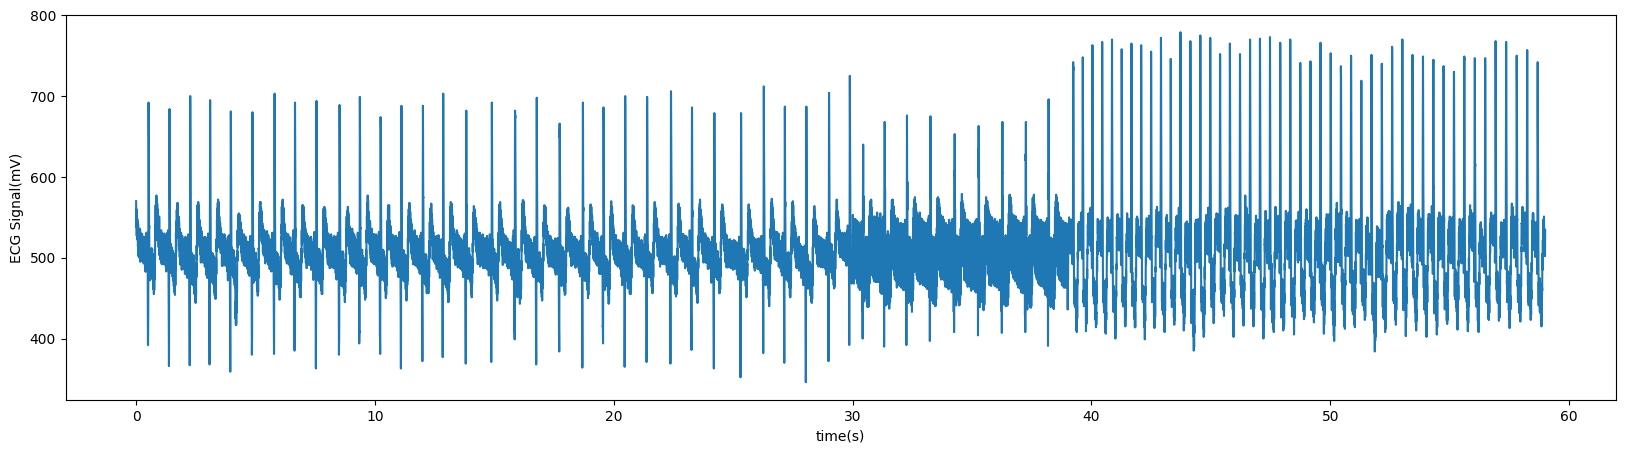

In [ ]:
Ts=1/Fs
n = np.arange(0,59000)  # t = n*Ts ; Array de numeros de datos
t = n*Ts              #VECTOR TIEMPO 

## COnvirtiendo a numpy
td = t - t.min()
mtime = t
voltaje = new_data.to_numpy()
plt.figure(figsize=(20,5))
plt.plot(mtime, voltaje)
plt.ylabel('ECG Signal(mV)')
plt.xlabel('time(s)')
plt.show()

##Analizando la frecuencia

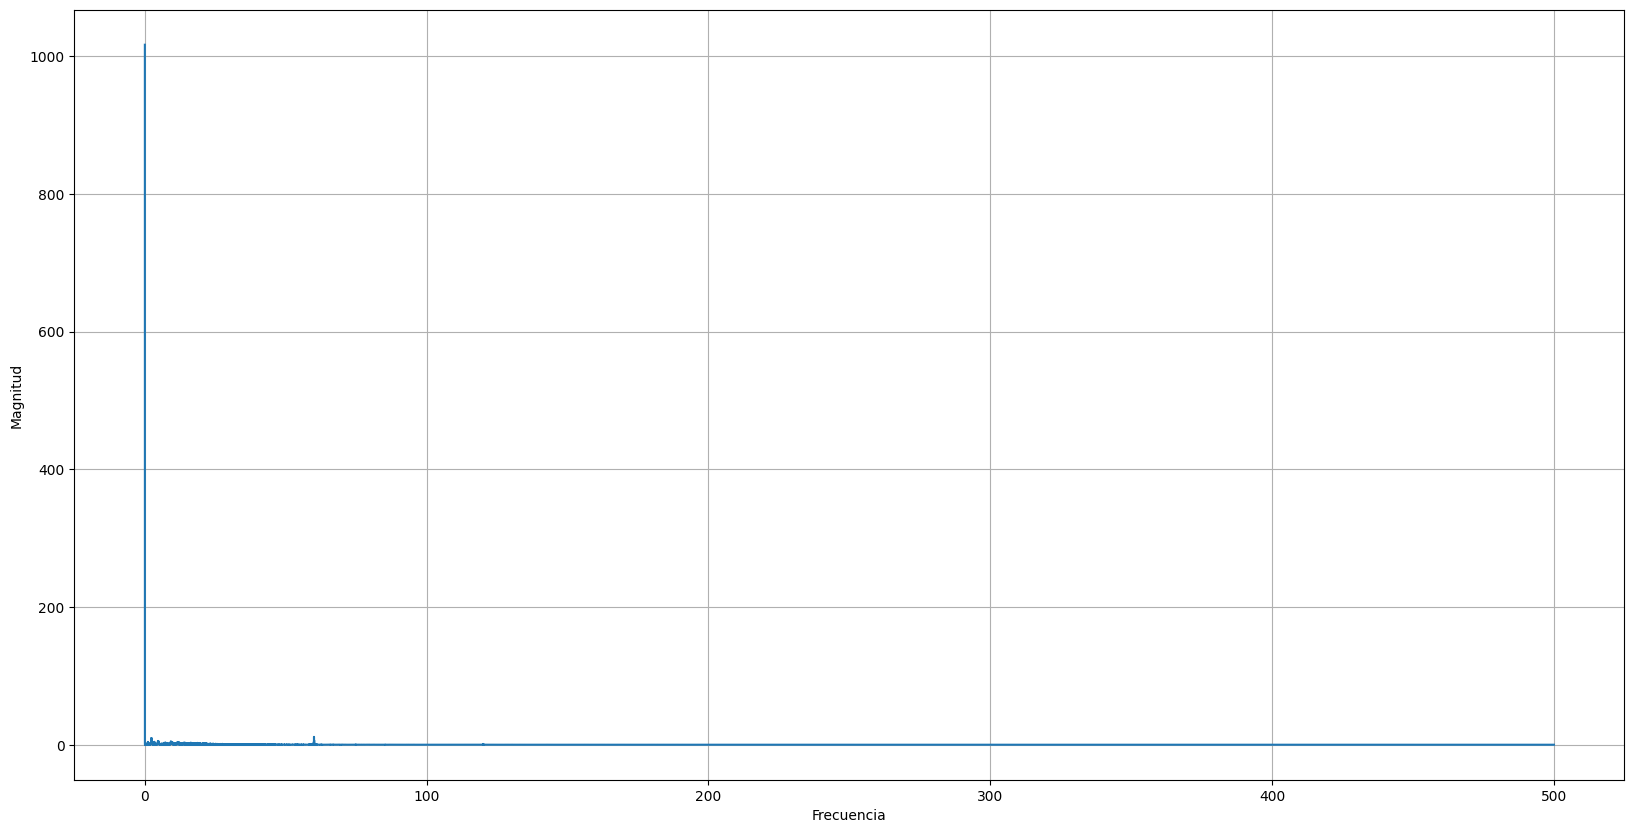

In [ ]:
# Analizar el Fourier
ecg_senal = voltaje
# Periodo de 1ms (0.001s) o frecuencia de 1000 Hz
T = 0.001
N = len(ecg_senal)
yf = fft(ecg_senal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

Se observa un pico muy pronunciado en 0-1 Hz, Por ello se ubicará el grafico después de 1 Hz para analizar los picos de la gráfica restante.

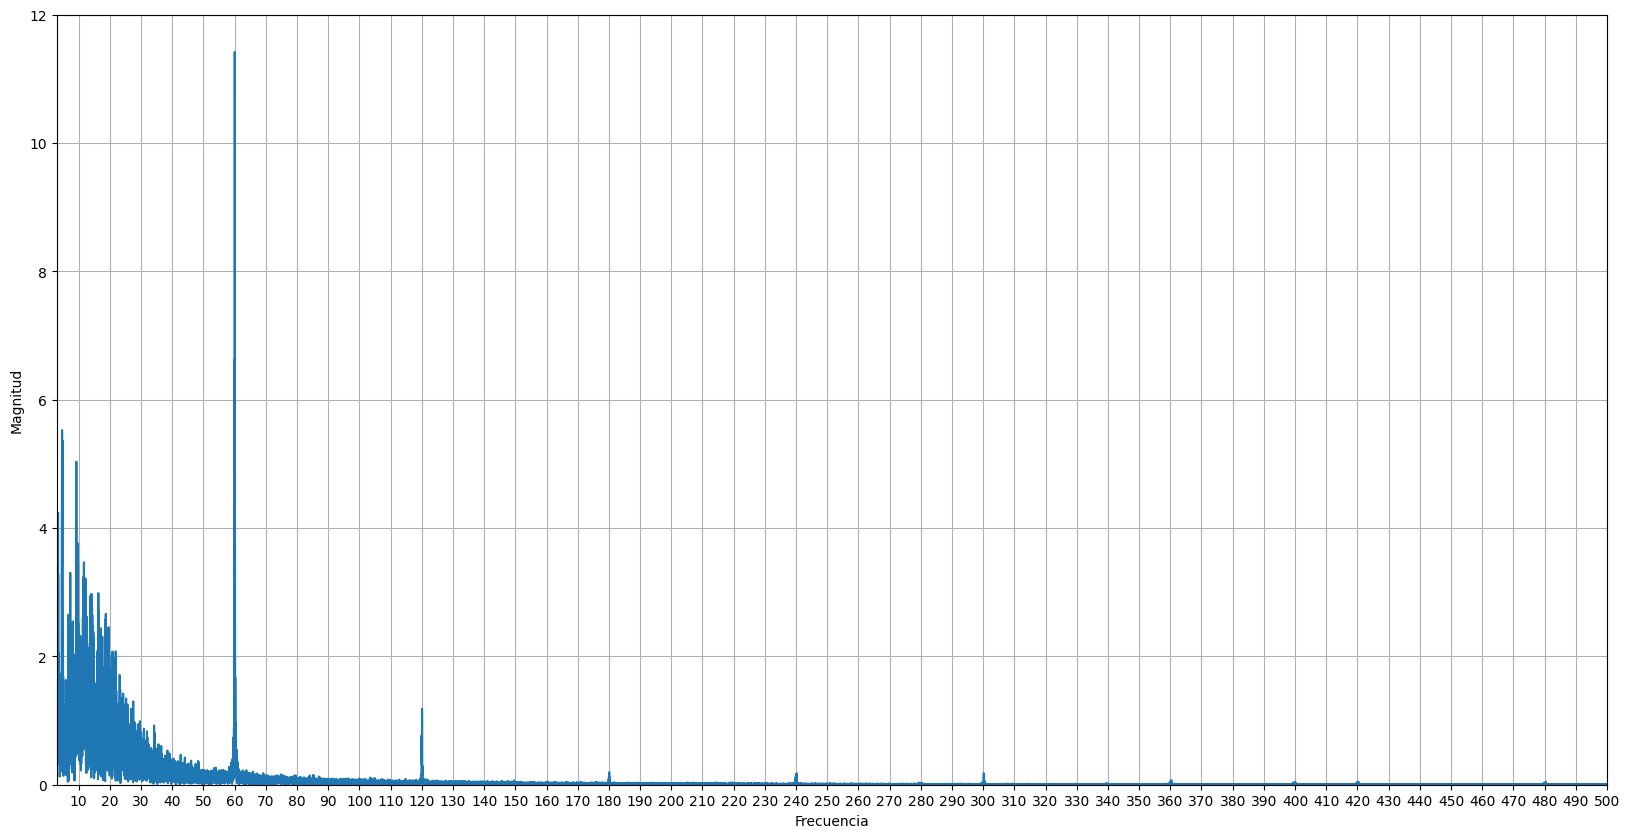

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
ticks = np.arange(0, 510, 10)
plt.xticks(ticks)
plt.xlabel("Frecuencia")
plt.xlim(3,500)
plt.ylim(0,12)
plt.ylabel("Magnitud")
plt.show()

En el gráfico anterior, existe un ruido en 60 Hz y armónicos en 120, 180, 240, 300, 360 HZ. Por lo tanto, son frecuencias que se deben filtrar. Se propone utilizar filtros digitales Notch



#Filtros

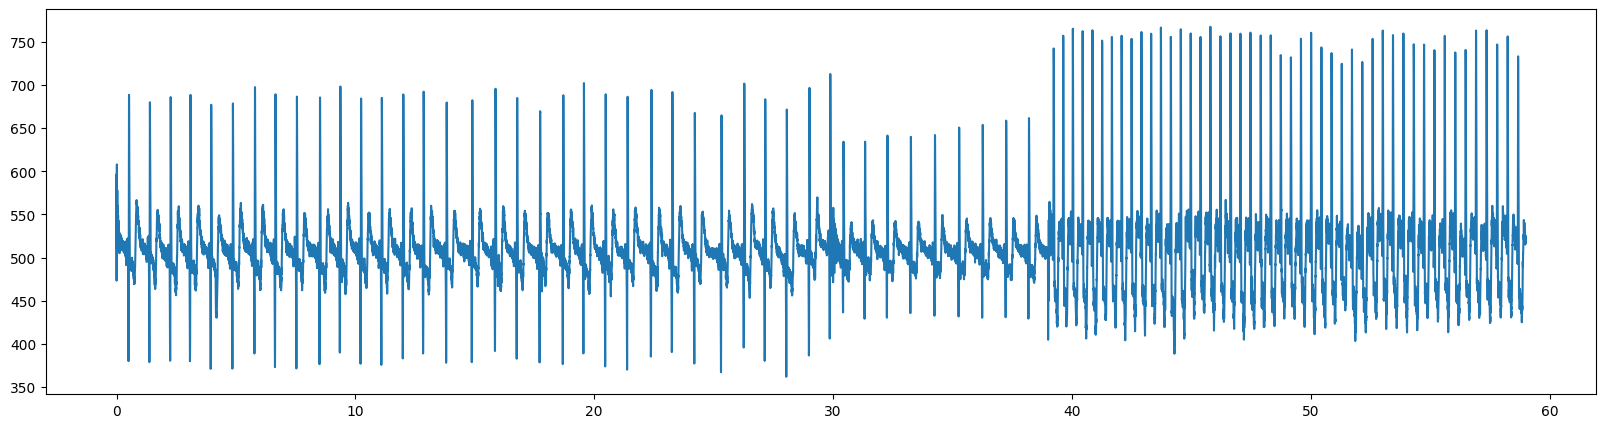

In [ ]:
# Utilizar filtros Notch para quitar frecuencias que hagan ruido
from scipy.signal import iirnotch, lfilter
fs = 1/T  # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, fs)
y = lfilter(b, a, ecg_senal)
# y = lfilter(b, a, y)

fs = 1/T  # Frecuencia de muestreo (Hz)
f0 = 120.0  # Frecuencia que queremos filtrar (Hz)
Q = 7.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, fs)
y = lfilter(b,a,y)
plt.figure(figsize=(20,5))
#plt.xlim(0,200)
plt.plot(mtime,y)
plt.show()

##FFT filtrada

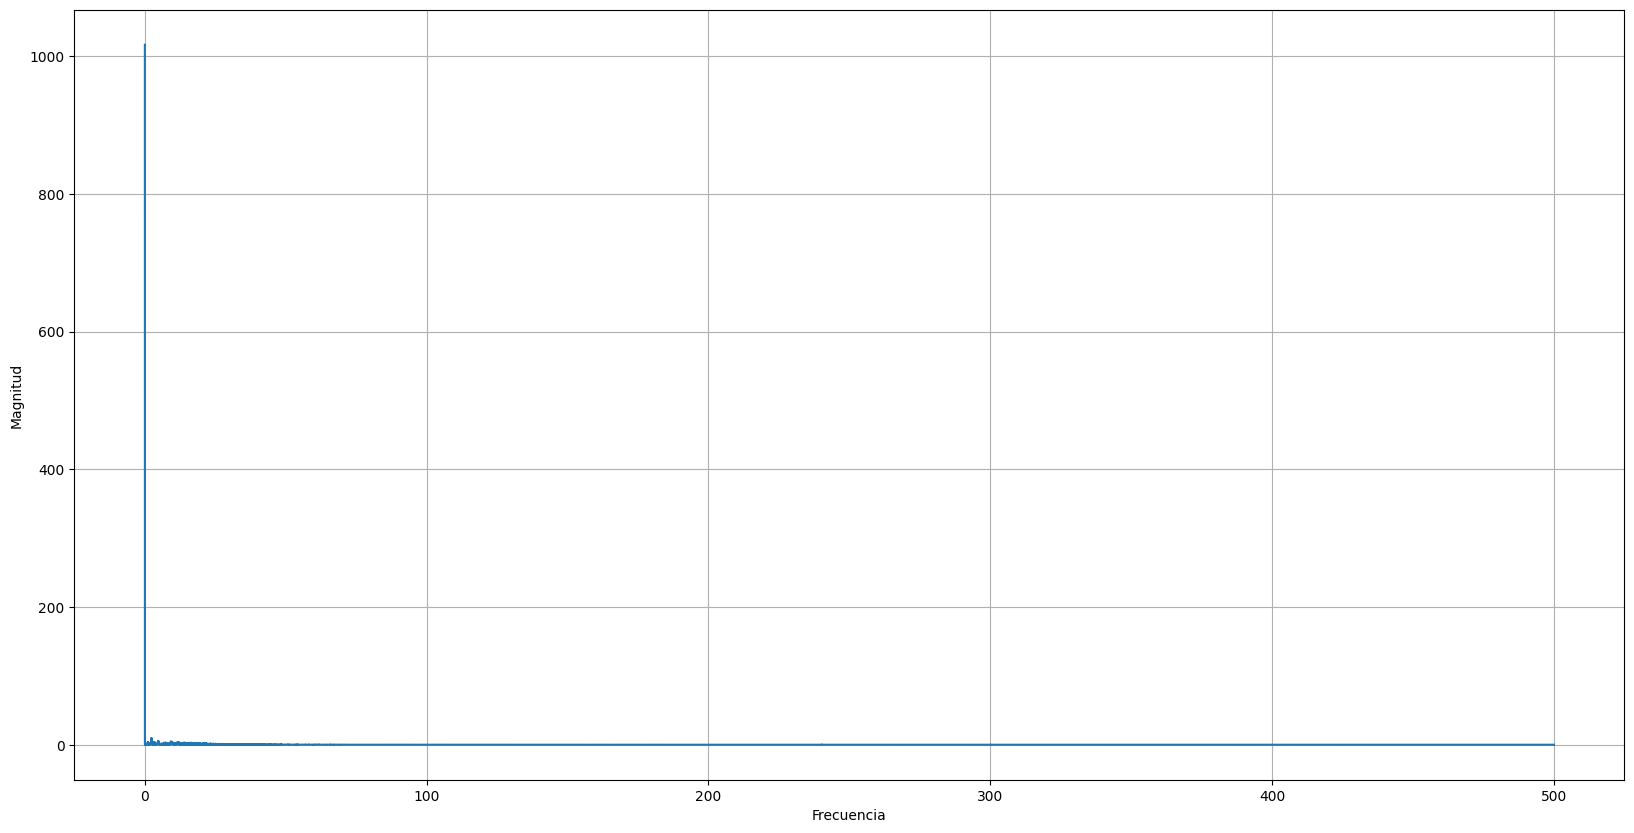

In [ ]:
# Analisis de Fourier de los filtros
# Periodo de 2ms (0.001s) o frecuencia de 1000 Hz
T = 0.001
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()
ecg_signal = y

###Enfocando FFT

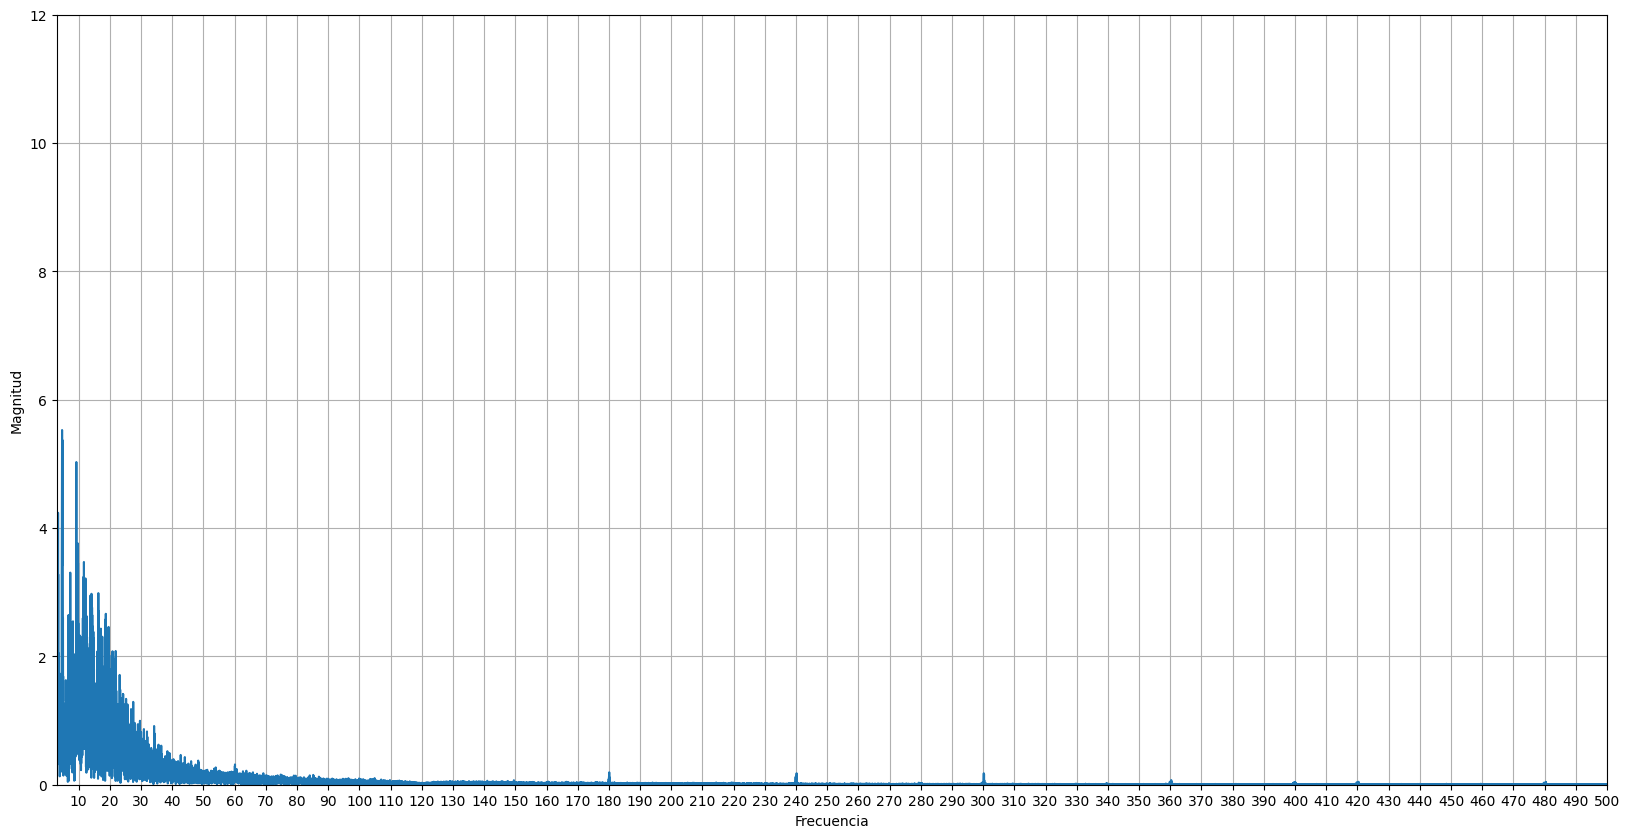

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
ticks = np.arange(0, 510, 10)
plt.xticks(ticks)
plt.xlabel("Frecuencia")
plt.xlim(3,500)
plt.ylim(0,12)
plt.ylabel("Magnitud")
plt.show()

##Filtro Pasa banda

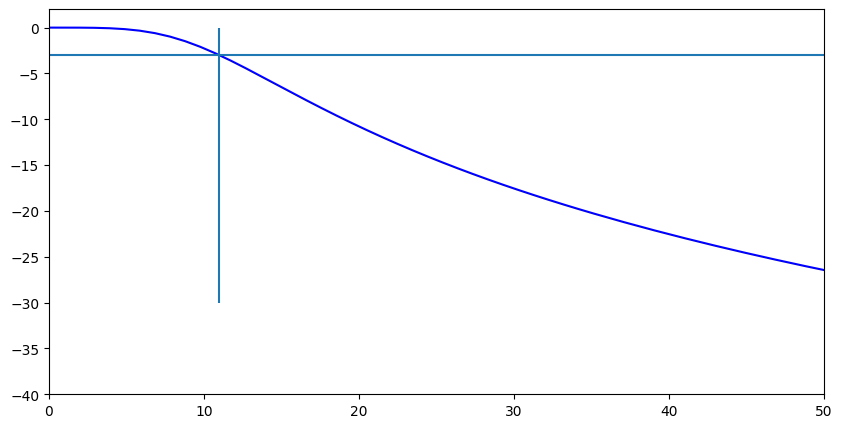

In [ ]:
from scipy.signal import freqz, iirdesign, iirfilter, find_peaks
# 2. filtro pasa banda
# Sub filtro pasa bajo
b, a = iirfilter(2, 11.0, btype='lowpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.hlines(-3,0,250)
plt.xlim(0,50)
plt.vlines(11, -30, 0)
plt.ylim(-40,2)
plt.show()

###Observando el filtro

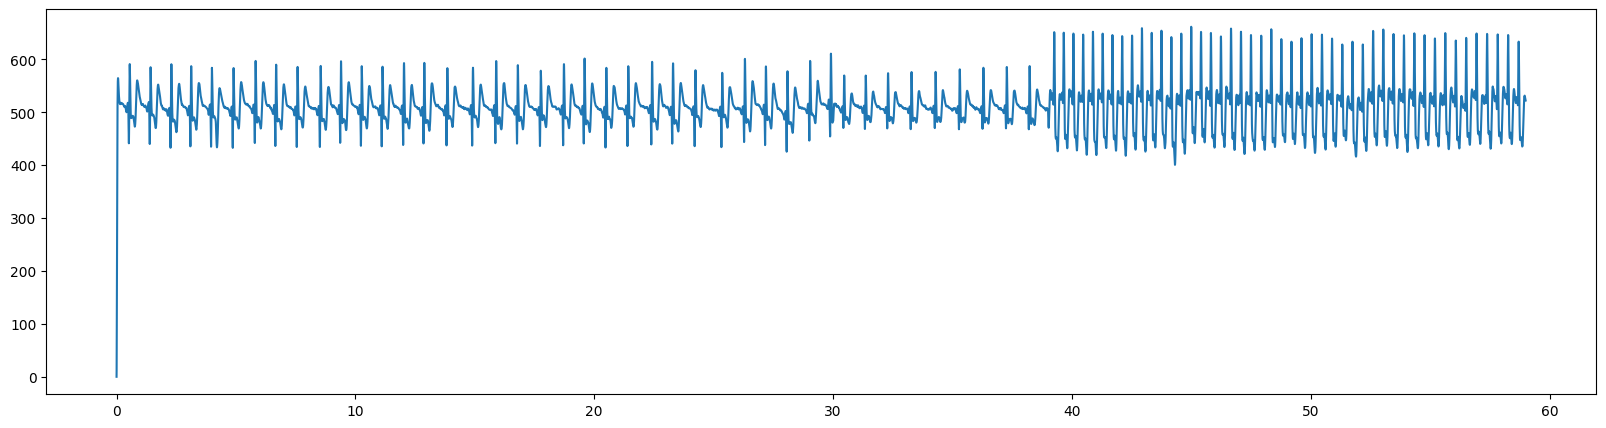

In [ ]:
fpb_signal = lfilter(b, a, ecg_signal)
plt.figure(figsize=(20,5))
plt.plot(mtime,fpb_signal)
# plt.xlim(2,60)
plt.show()

Limitando la señal para una mejor visualización.

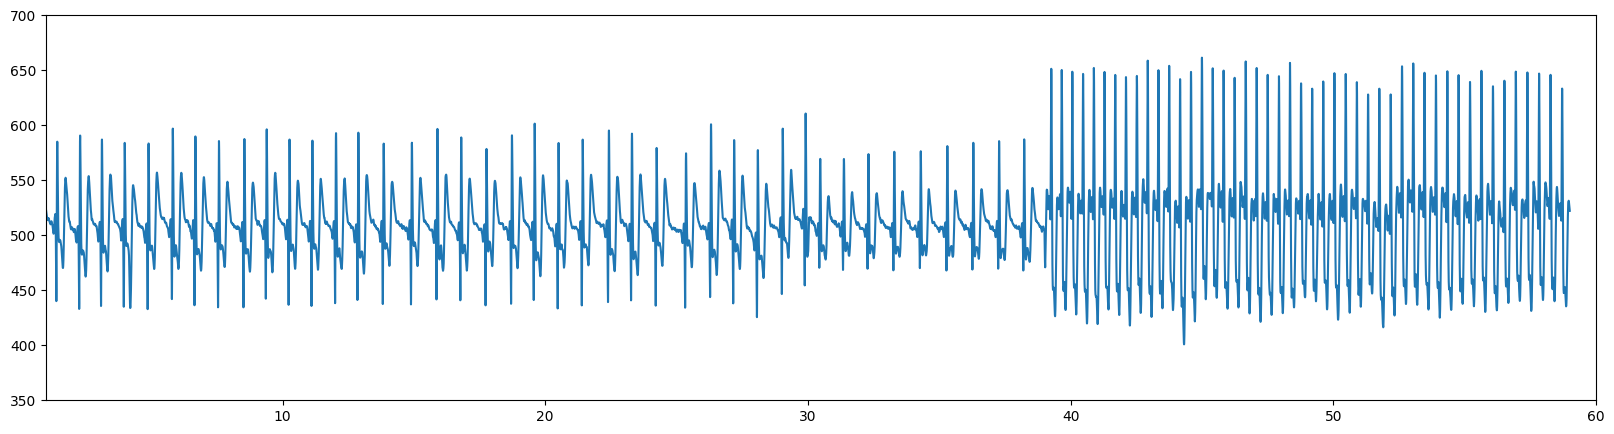

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mtime,fpb_signal)
plt.xlim(1,60)
plt.ylim(350,700)
plt.show()

##Filtro Pasa Alto

<ipython-input-28-ad1bb2aa6391>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


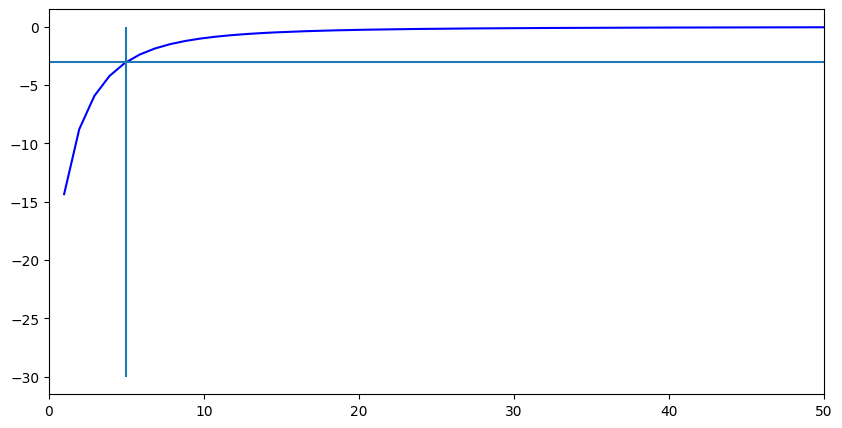

In [ ]:
b, a = iirfilter(1, 5.0, btype='highpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.hlines(-3,0,250)
plt.xlim(0,50)
plt.vlines(5, -30, 0)
plt.show()

###Observar el filtro

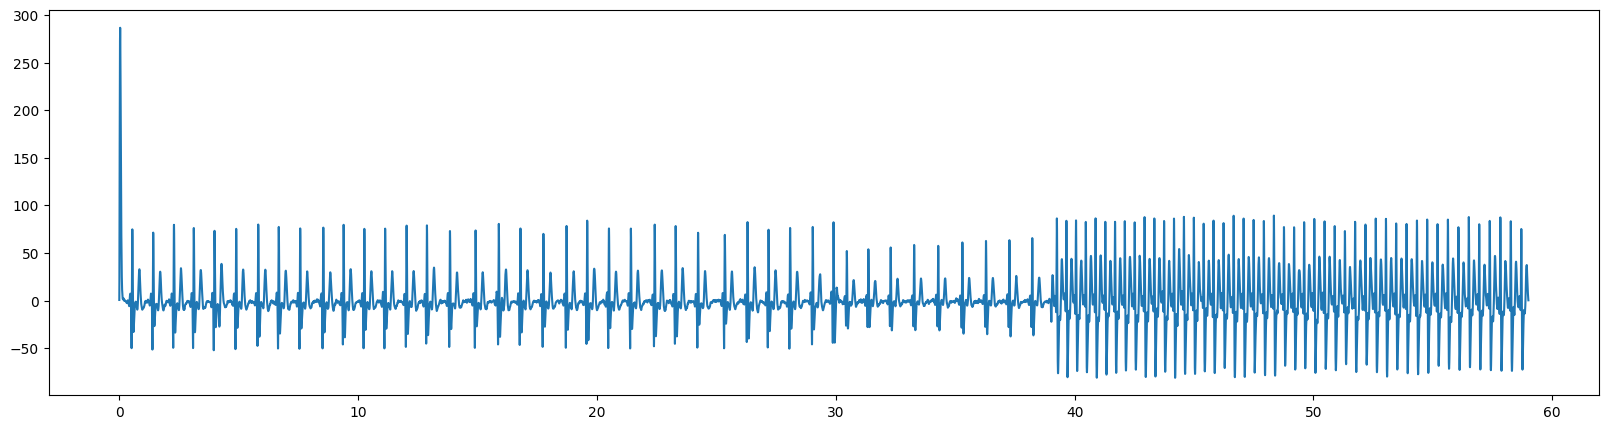

In [ ]:
fpa_signal = lfilter(b, a, fpb_signal)
plt.figure(figsize=(20,5))
plt.plot(mtime,fpa_signal)
plt.show()

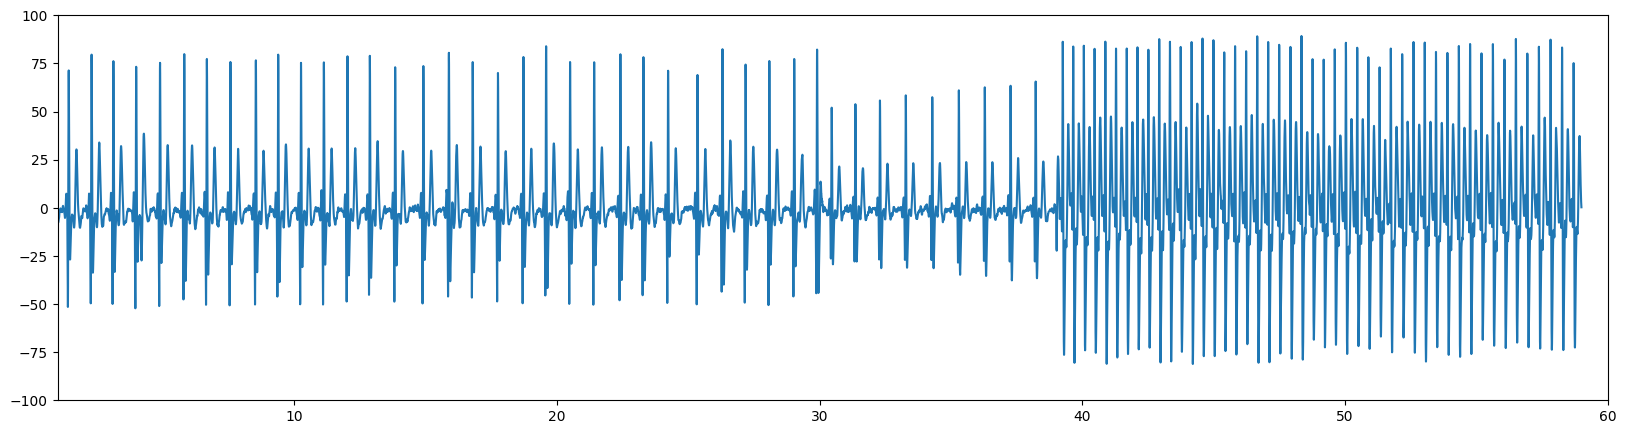

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mtime,fpa_signal)
plt.xlim(1,60)
plt.ylim(-100,100)
plt.show()

### FFT filtrada

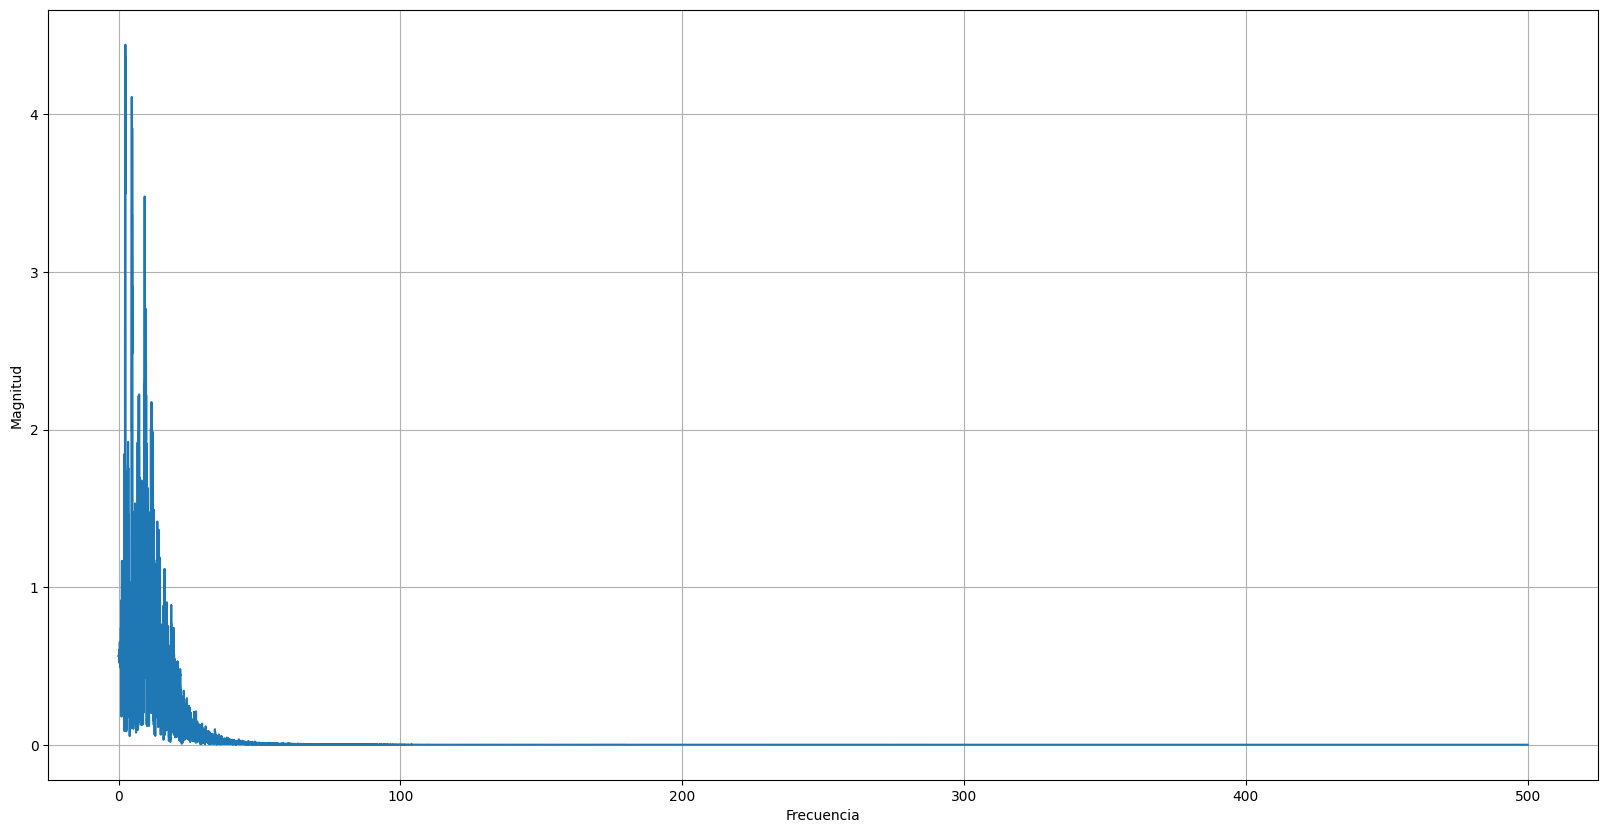

In [ ]:
T = 0.001
N = len(fpa_signal)
yf = fft(fpa_signal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

In [ ]:
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.grid()
# plt.xlabel("Frecuencia")
# plt.ylabel("Magnitud")
# plt.xlim(1,11)

# plt.show()

#Operador Derivativo

<ipython-input-35-e4428ba3d9cf>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


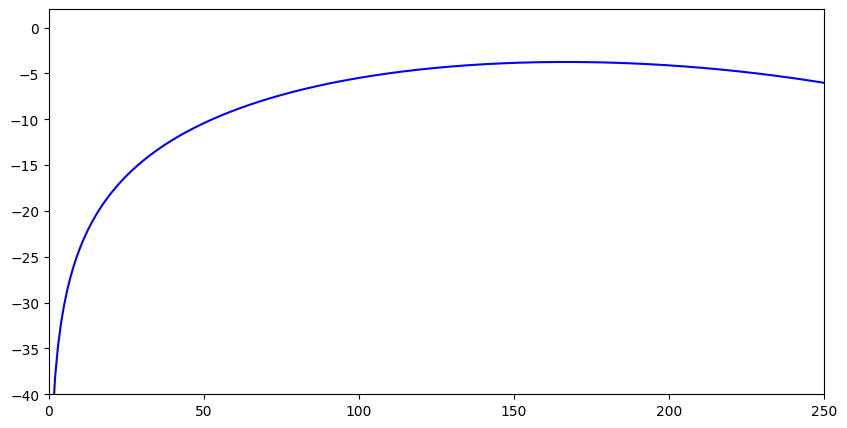

In [ ]:
# Filtro derivativo
b = np.array([-1, -2, 0, 2, 1])
b = (1/8)*b
w, h = freqz(b, 1, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.xlim(0,250)
plt.ylim(-40,2)
plt.show()

###Observando la señal

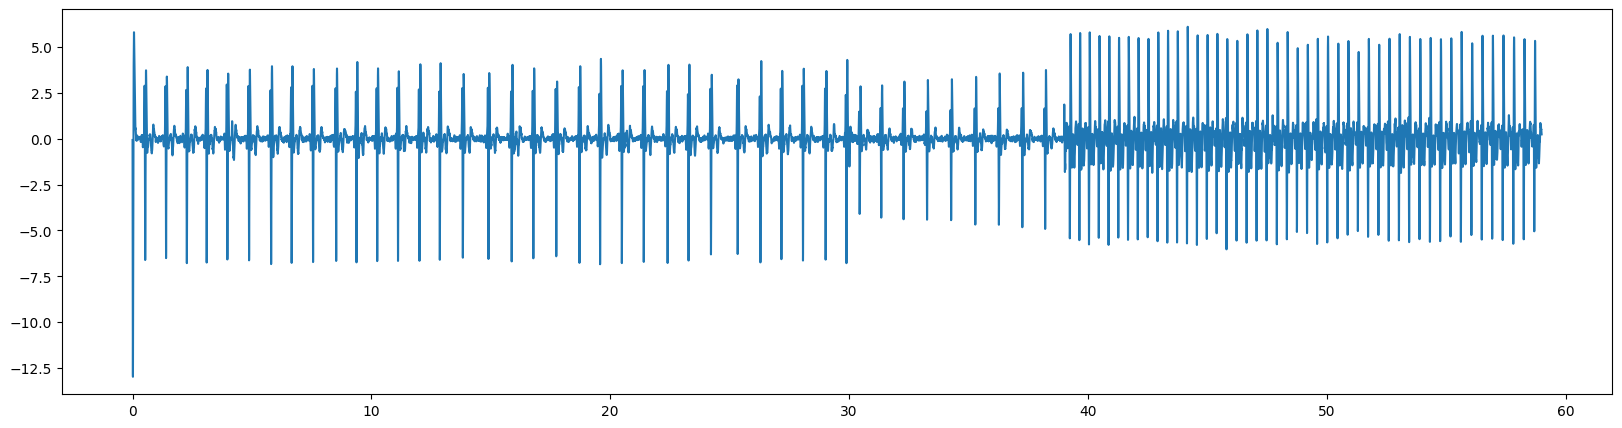

In [ ]:
fd_signal = lfilter(b, 1, fpa_signal)
plt.figure(figsize=(20,5))
plt.plot(mtime,fd_signal)
plt.show()

##Operador Cuadrático

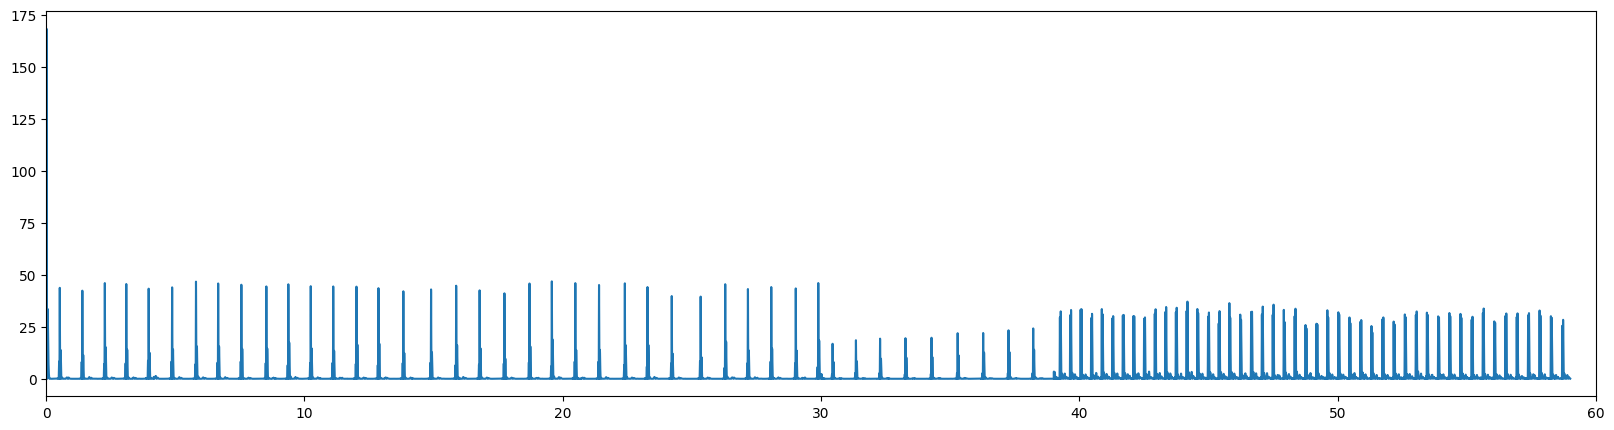

In [ ]:
# Filtro cuadrado
f_sq = np.square(fd_signal)
plt.figure(figsize=(20,5))
plt.plot(mtime, f_sq)
plt.xlim(0,60)
plt.show()

##Operador Moving Window Integration

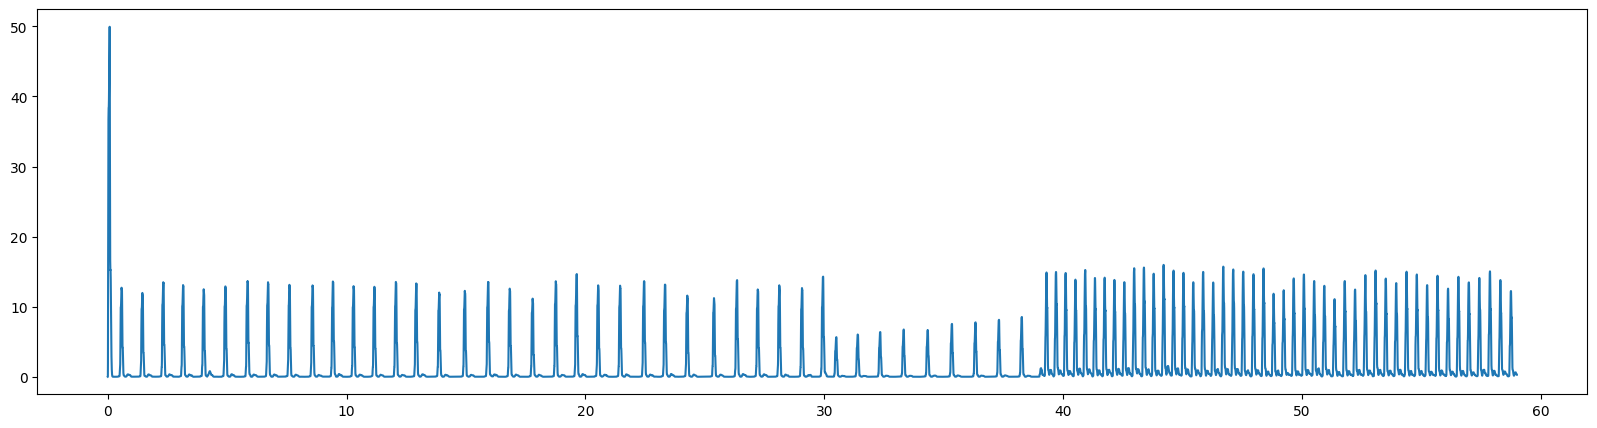

In [ ]:
# Moving-Window Integration
N = 75
b = np.ones(N-1)
b = (1/N)*b
fi_signal = lfilter(b, 1, f_sq)
plt.figure(figsize=(20,5))
plt.plot(mtime,fi_signal)
plt.show()

##Marcadores de Pico

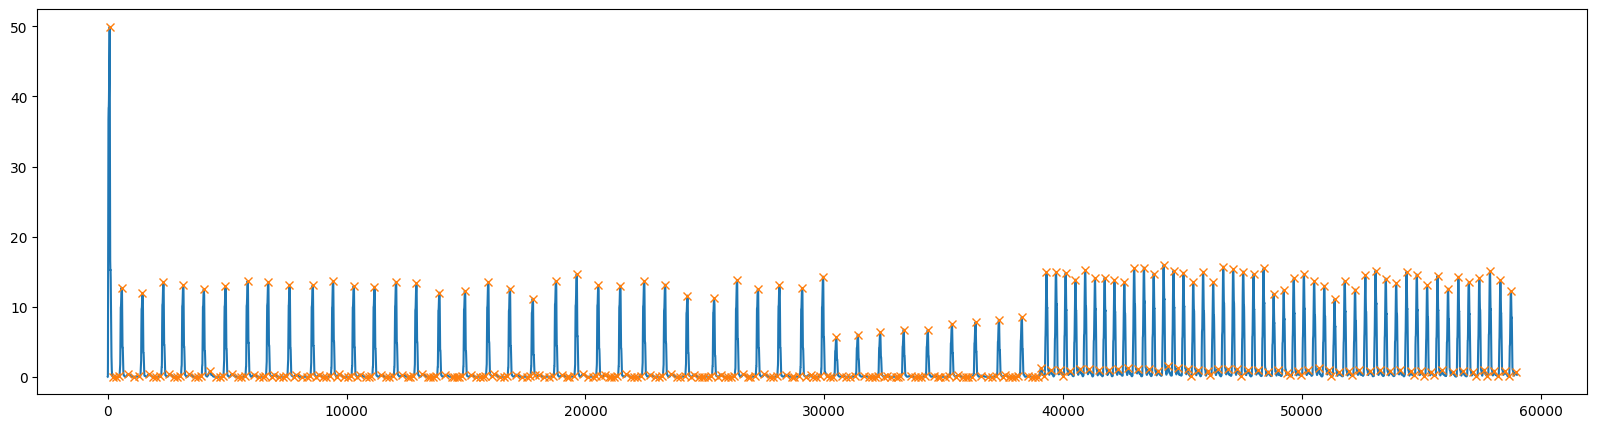

In [ ]:
# Fiducial Marks
peaks, _ = find_peaks(fi_signal, distance=100)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
plt.plot(peaks, fi_signal[peaks], "x")
plt.show()

##Ánalisis de Threshold

El valor del umbral de pico R de entrada es  12.484863747068829
El valor del umbral de ruido de entrada es  1.805521223562407


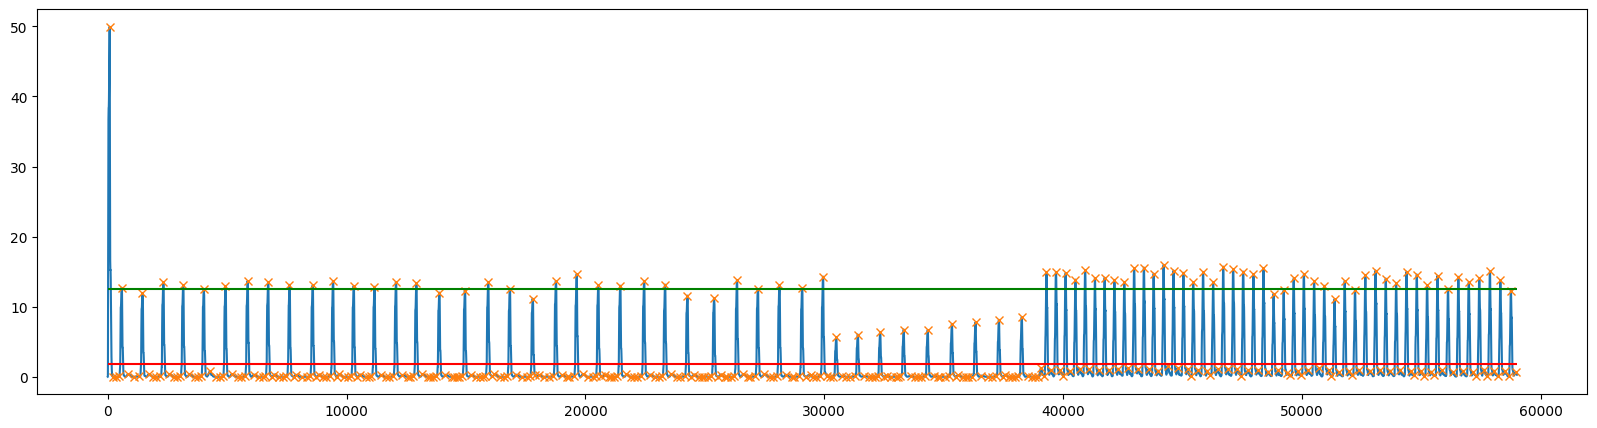

In [ ]:
# Training Part to set Threshold I1 and Threshold I2 Para las primeras muestras en 2 segundos. Para efectos del ejercicio vamos a analizar toda la señal
f_samples = len(peaks)
th_I1 = np.max(fi_signal[peaks[:f_samples]])*0.25
th_I2 = 0.5*np.mean(fi_signal[peaks[:f_samples]])
print ("El valor del umbral de pico R de entrada es ", th_I1)
print ("El valor del umbral de ruido de entrada es ", th_I2)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
#plt.xlim(50,1000)
plt.plot(peaks, fi_signal[peaks], "x")
plt.hlines(th_I1, 0, len(fi_signal), colors='green')
plt.hlines(th_I2, 0, len(fi_signal), colors='red')
plt.show()

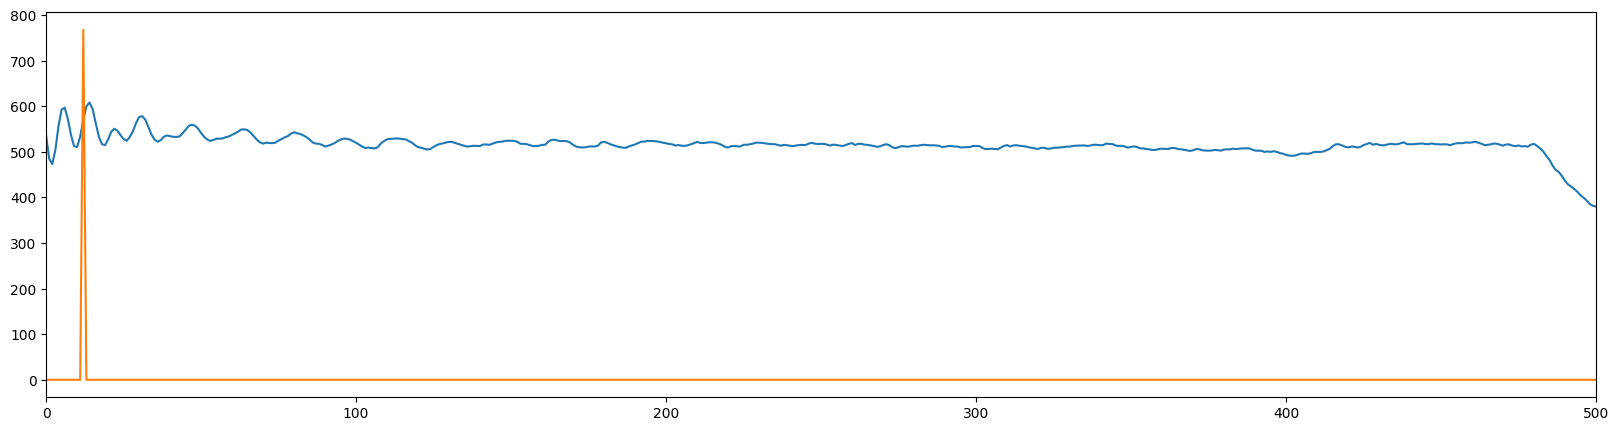

In [ ]:
end_qrs = fi_signal > th_I1
roll_qrs_r = np.roll(end_qrs, 1)
roll_qrs_l = np.roll(end_qrs, -1)
end_qrs = np.logical_xor(end_qrs ,roll_qrs_r)
end_qrs = np.logical_and(end_qrs ,roll_qrs_l)
plt.figure(figsize=(20,5))
plt.xlim(0,500)
plt.plot(ecg_signal)
plt.plot(end_qrs*np.max(ecg_signal))
plt.show()

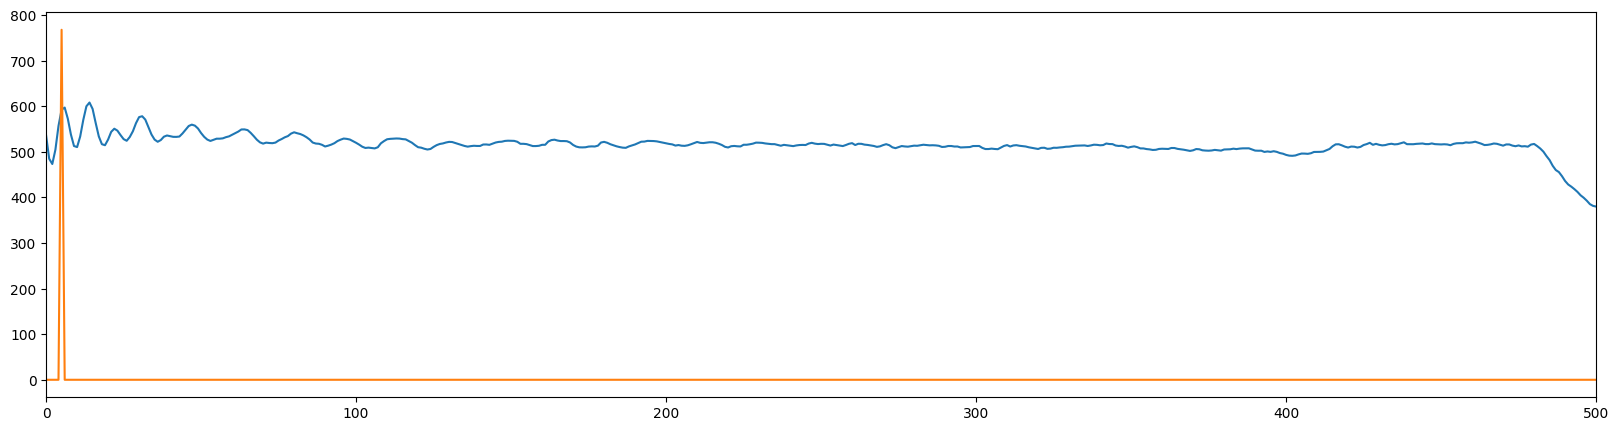

In [ ]:
start_qrs = fi_signal < th_I2
roll_qrs_l = np.roll(start_qrs, -1)
roll_qrs_r = np.roll(start_qrs, 1)
start_qrs = np.logical_xor(start_qrs ,roll_qrs_l)
start_qrs = np.logical_and(start_qrs ,roll_qrs_r)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.xlim(0,500)
plt.plot(start_qrs*np.max(ecg_signal))
plt.show()

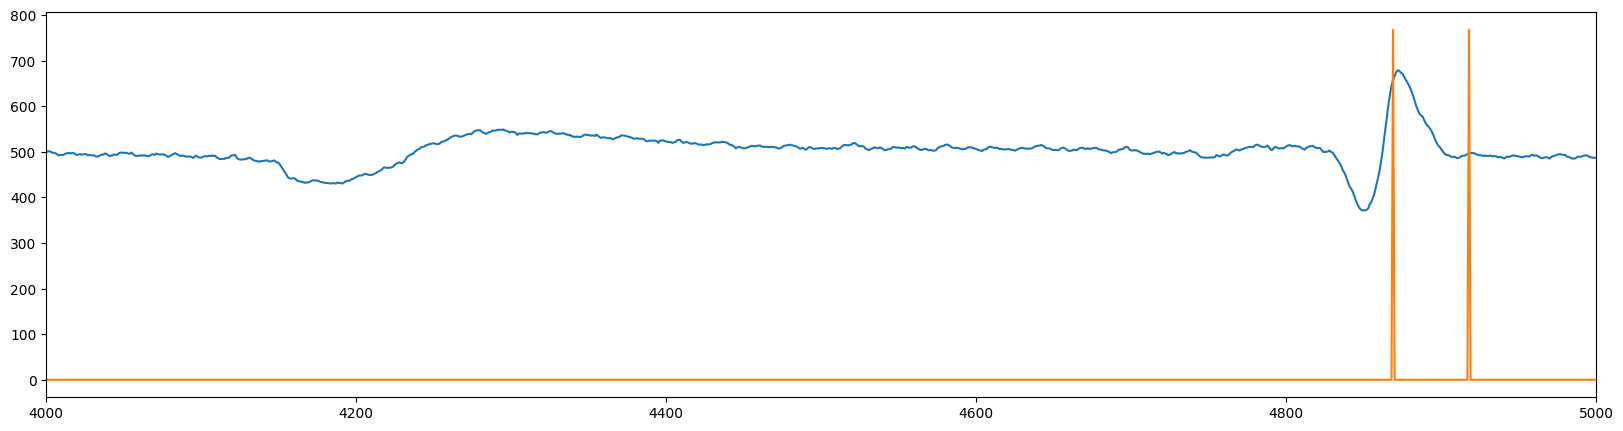

In [ ]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.xlim(4000,5000)
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.show()

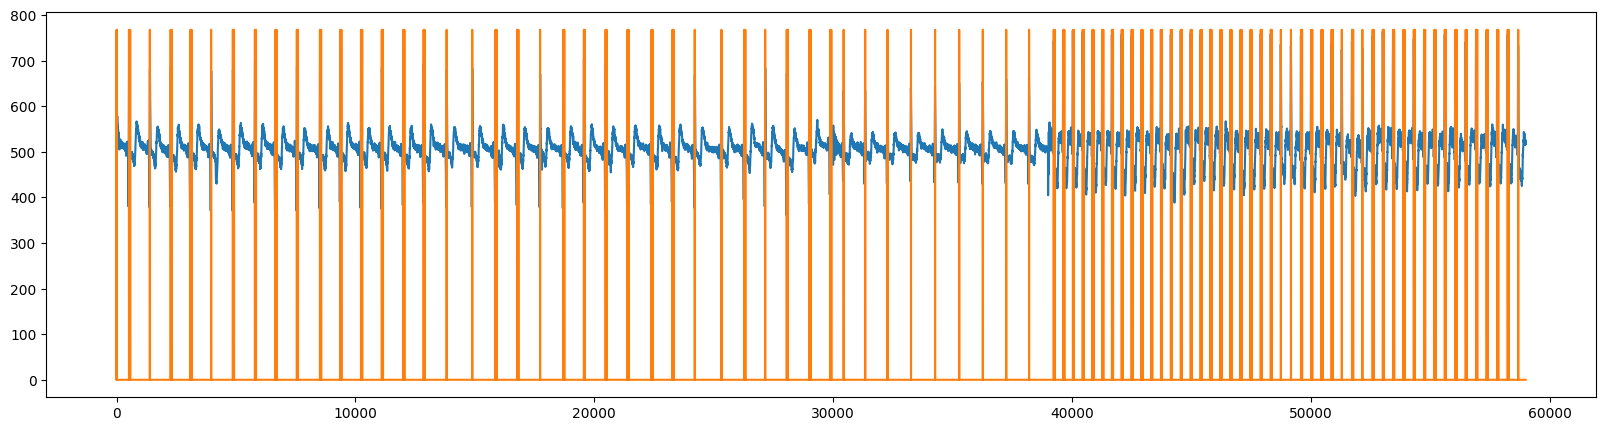

In [ ]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.show()

Viendo para estado Basal

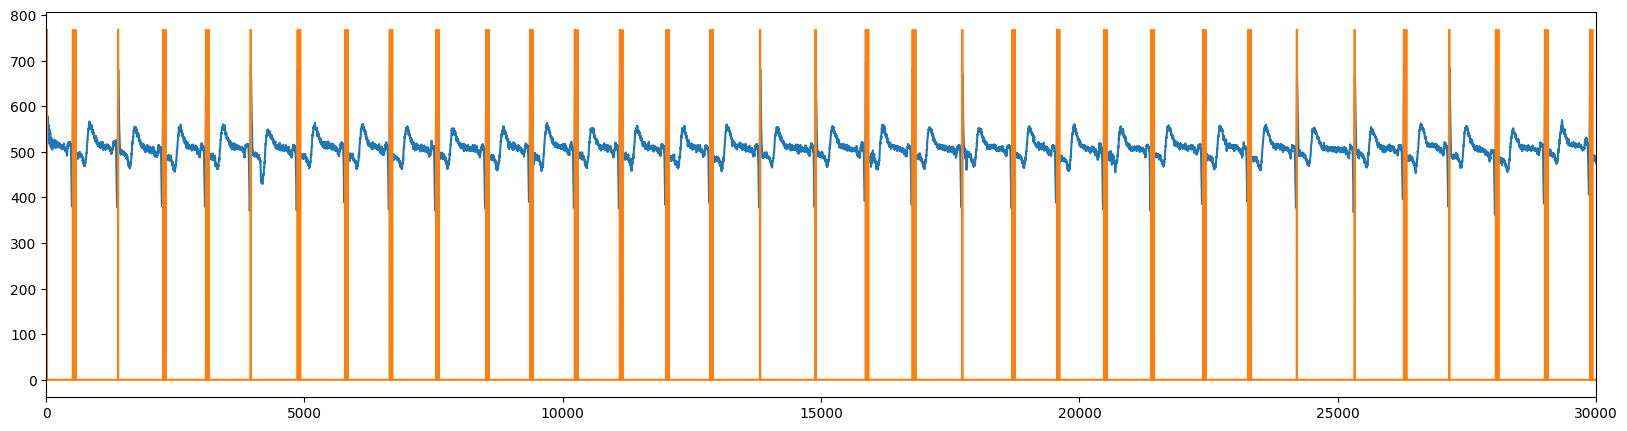

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.xlim(0,30000)
plt.show()

Viendo para el estado de aguantar la respiración

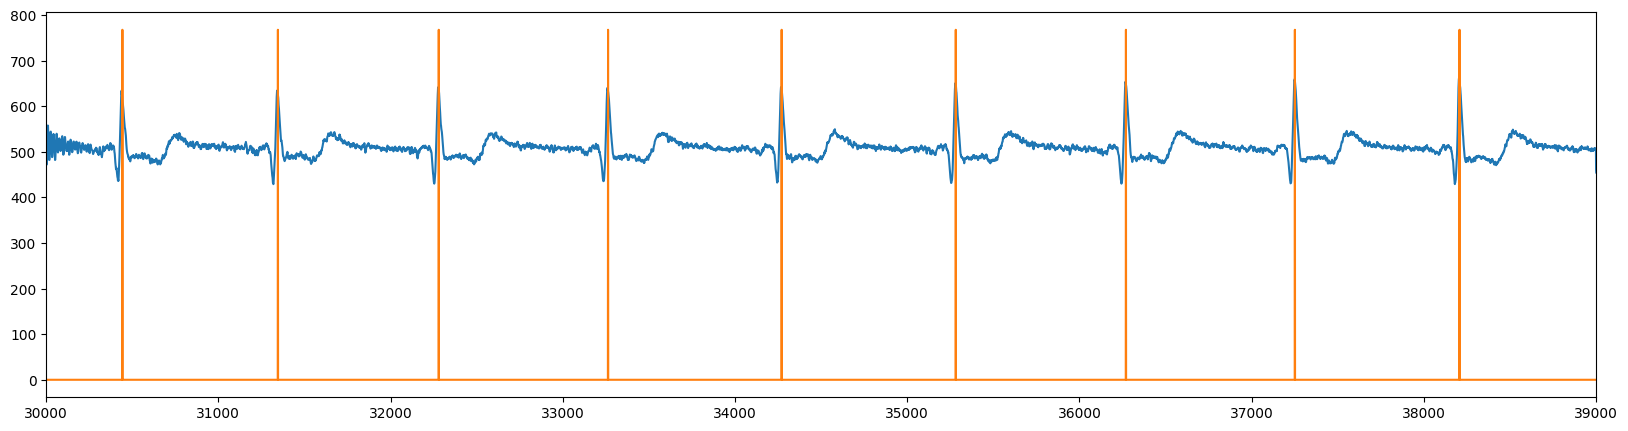

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.xlim(30000,39000)
plt.show()

Viendo el estado post-ejercicio

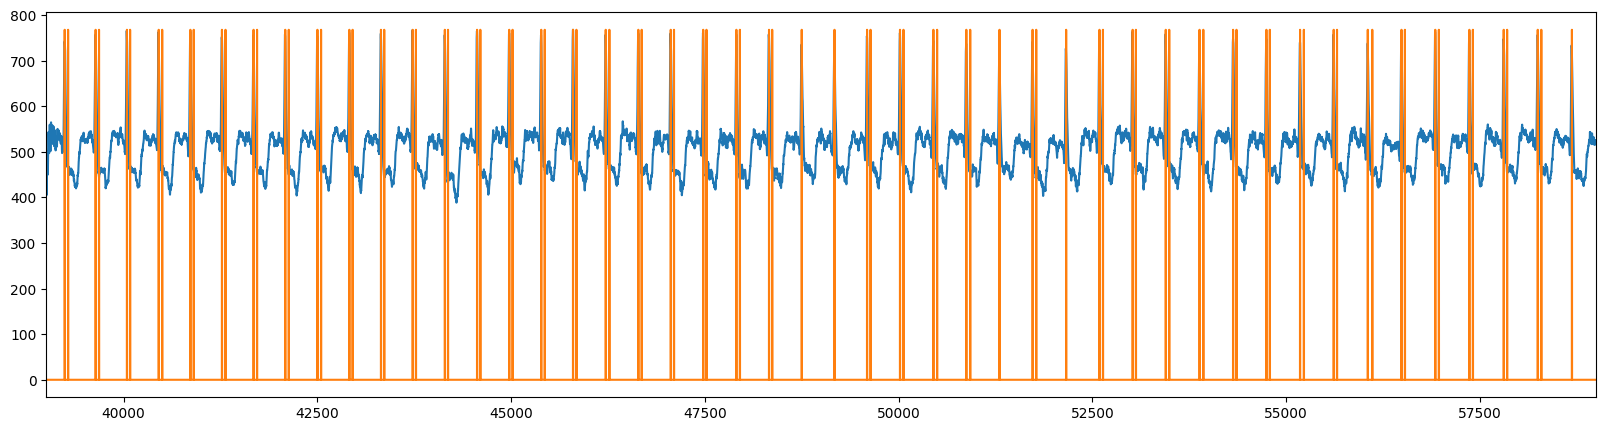

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.xlim(39000,59000)
plt.show()